In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot figures
import seaborn as sns # plot figures
import plotly.express as px
from datetime import datetime
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from statistics import mean, median, stdev, variance
import glob
import os
import math
import random
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
file_path = "D:\\Jupyter-workspace\\PCCM Manuscript_Data Description\\b_Assign Diagnosis Groups\\"

In [3]:
df = pd.read_csv(file_path+"df_monitor_patients.csv")
print(len(df))

1711


In [4]:
# local file path
path=r'D:\00_UCL_Z-score_Data_Files'

In [5]:
# read all csv files from path folder
numerical_CSV_files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
# print total number of files
len(numerical_CSV_files)

1781

In [7]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,cats_id,gender,weight_kg,age_mon,referral_outcome_datetime,referring_unit,primary_diagnosis,diagnosis_group,...,c_abpSys,c_nbpMean,c_nbpDia,c_nbpSys,c_nPleth,c_ecgRate,c_nPoxy,key_vital_sign_count,total_transport_time,Diagnosis_Group
0,0,0,30006,Female,3.30,2.0,01/07/2016 18:37,Lister Hospital-(RWH01),Atrioventricular septal defect: atrial and ven...,NaN,...,0,5115,5115,5115,5771,6046,0,0,225,Cardiovascular
1,1,1,30008,Male,3.92,0.0,01/07/2016 21:50,Luton and Dunstable Hospital-(RC971),Coarctation of aorta,NaN,...,0,4944,4944,4944,5698,5576,0,0,225,Cardiovascular
2,2,2,30013,Male,2.20,2.0,02/07/2016 23:45,Homerton University Hospital-(RQXM1),Lower respiratory tract infection,NaN,...,0,2224,2224,2225,2260,2410,0,0,200,Respiratory


In [8]:
df['InvasiveVentilation'] = df['ventilation_status'].apply(lambda x: 'Yes' if 'Invasive' in x else 'No')

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'cats_id', 'gender', 'weight_kg',
       'age_mon', 'referral_outcome_datetime', 'referring_unit',
       'primary_diagnosis', 'diagnosis_group', 'preexisting_conditions',
       'ventilation_status', 'vasoactive_agent_used', 'vasoactive_agent_name',
       'inhaled_no', 'arrive_collunit', 'depart_destunit', 'cats_interv',
       'local_interv', 'pim3', 'transport_team_in_attendance',
       'referral_datetime', 'referral_outcome', 'critical_incident',
       'incident_type', 'csv_files', 'min_session_time', 'max_session_time',
       'start_datetime', 'end_datetime', 'length_of_stay',
       'length_of_icu_stay', 'deceased_flag', 'sex', 'ethnicity_nat_code',
       'ethnicity_name', 'age_at_admission', 'age_at_death',
       'Destination Unit', 'Destination Care Area', 'Depart Collection Unit',
       'Arrive Destination Unit', 'dest_is_GOSH',
       'CI_Patient_Equipment_Related', 'CI_Patient_Related',
       'CI_Ambulance_Related', 'CI_Equipment_

In [10]:
df1 = df.loc[df['Diagnosis_Group'] == 'Respiratory']
df1.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
2,30013,Respiratory
3,30018,Respiratory
4,30024,Respiratory


In [11]:
df_SPO2_Respiratory= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_Respiratory.extend(ECG)

In [12]:
df_etCO2_Respiratory= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_Respiratory.extend(ECG)

In [13]:
df2 = df.loc[df['Diagnosis_Group'] == 'Cardiovascular']
df2.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
0,30006,Cardiovascular
1,30008,Cardiovascular
10,30046,Cardiovascular


In [14]:
df_SPO2_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_cardio.extend(ECG)

In [15]:
df_etCO2_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_cardio.extend(ECG)

In [16]:
df3 = df.loc[df['Diagnosis_Group'] == 'Neurological']
df3.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
15,30082,Neurological
27,30201,Neurological
29,30235,Neurological


In [17]:
df_SPO2_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_neuro.extend(ECG)

In [18]:
df_etCO2_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_neuro.extend(ECG)

In [19]:
df4 = df.loc[df['Diagnosis_Group'] == 'Infection']
df4.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
14,30077,Infection
51,30386,Infection
53,30400,Infection


In [20]:
df_SPO2_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_infection.extend(ECG)

In [21]:
df_etCO2_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_infection.extend(ECG)

In [22]:
df5 = df.loc[df['Diagnosis_Group'] == 'Gastrointestinal']
df5.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
12,30055,Gastrointestinal
16,30086,Gastrointestinal
24,30127,Gastrointestinal


In [23]:
df_SPO2_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_gastro.extend(ECG)

In [24]:
df_etCO2_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_gastro.extend(ECG)

In [25]:
df6 = df.loc[df['Diagnosis_Group'] == 'Trauma']
df6.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
5,30026,Trauma
69,30466,Trauma
136,31513,Trauma


In [26]:
df_SPO2_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_trauma.extend(ECG)

In [27]:
df_etCO2_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_trauma.extend(ECG)

## bronchiolitis

In [28]:
df['lower_disease_name'] = df["primary_diagnosis"].str.lower()
df7 = df.loc[df['lower_disease_name'].str.contains("bronchiolitis",case=False)]

In [29]:
df_SPO2_bronchiolitis= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df7[df7['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_bronchiolitis.extend(ECG)

In [30]:
df_etCO2_bronchiolitis= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df7[df7['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_bronchiolitis.extend(ECG)

##  Congenital Heart Disease

In [31]:
df['lower_disease_name'] = df["primary_diagnosis"].str.lower()
Congenital_Heart_Disease_List = pd.read_excel('Congenital Heart Disease.xlsx')
Congenital_Heart_Disease_List = Congenital_Heart_Disease_List['Congenital Heart Disease'].str.lower()
CHD_List = Congenital_Heart_Disease_List.tolist()
df8 = df[df['lower_disease_name'].isin(CHD_List)]

In [32]:
df_SPO2_Congenital= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df8[df8['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_Congenital.extend(ECG)

In [33]:
df_etCO2_Congenital= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df8[df8['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_Congenital.extend(ECG)

## sepsis

In [34]:
df['lower_disease_name'] = df["primary_diagnosis"].str.lower()
df9 = df.loc[df['lower_disease_name'].str.contains("sepsis|systemic|meningococcaemia|meningococcal",case=False)]

In [35]:
df_SPO2_sepsis= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df9[df9['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_sepsis.extend(ECG)

In [36]:
df_etCO2_sepsis= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df9[df9['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_sepsis.extend(ECG)

## Status epilepticus

In [37]:
df['lower_disease_name'] = df["primary_diagnosis"].str.lower()
df10 = df.loc[df['lower_disease_name'].str.contains("status",case=False)]

In [38]:
df_SPO2_status= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df10[df10['c_nPleth'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nPleth'] == df_data['nPleth']]
        df_data = df_data[df_data['nPleth'] != 0]
        ECG = df_data['nPleth'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SPO2_status.extend(ECG)

In [39]:
df_etCO2_status= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df10[df10['c_Coo'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nCoo'] == df_data['nCoo']]
        df_data = df_data[df_data['nCoo'] != 0]
        ECG = df_data['nCoo'].tolist()[0:600]
        # extract ECG value that is not nan
        df_etCO2_status.extend(ECG)

In [40]:
# https://stackoverflow.com/questions/18861075/overlaying-the-numeric-value-of-median-variance-in-boxplots
# 

In [41]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
#set_box_color(bpl, '#252525') # colors are from http://colorbrewer2.org/

In [42]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 5.5, 4.2

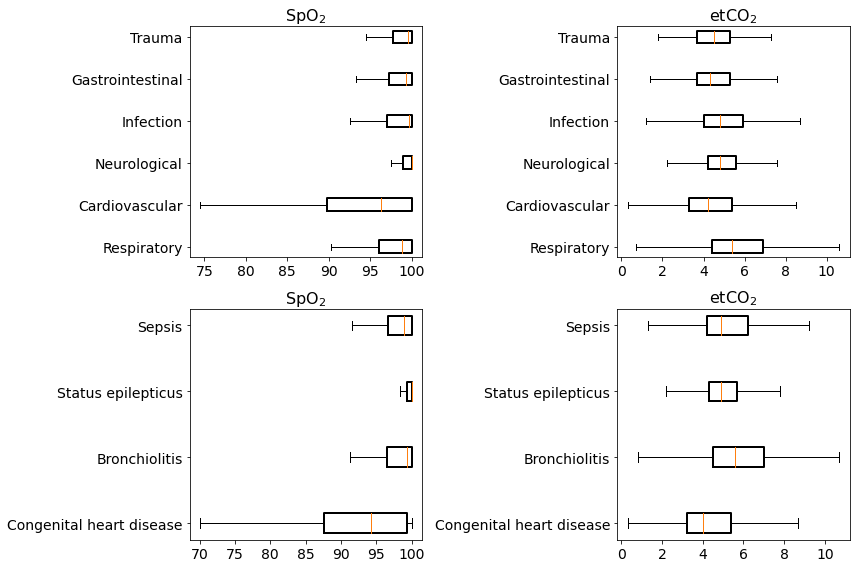

In [43]:
##### fig = plt.figure() # create the canvas for plotting
fig,((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,8))
ax1 = plt.subplot(2,2,1)
data = [df_SPO2_Respiratory,df_SPO2_cardio,df_SPO2_neuro,df_SPO2_infection,df_SPO2_gastro,df_SPO2_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-10,10)
plt.tight_layout()
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation = 0, Fontsize=14)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), Fontsize=14)
ax1.set_title('SpO$_2$', fontsize=16)

ax2 = plt.subplot(2,2,2)
data = [df_etCO2_Respiratory,df_etCO2_cardio,df_etCO2_neuro,df_etCO2_infection,df_etCO2_gastro,df_etCO2_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-10,10)
plt.tight_layout()
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation = 0, Fontsize=14)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), Fontsize=14)
ax2.set_title('etCO$_2$', fontsize=16)

ax3 = plt.subplot(2,2,3)
data = [df_SPO2_Congenital, df_SPO2_bronchiolitis, df_SPO2_status, df_SPO2_sepsis]
ticks = ['Congenital heart disease','Bronchiolitis','Status epilepticus','Sepsis']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-10,10)
plt.tight_layout()
ax3.set_xticklabels(labels=ax3.get_xticklabels(), rotation = 0, Fontsize=14)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), Fontsize=14)
ax3.set_title('SpO$_2$', fontsize=16)

ax4 = plt.subplot(2,2,4)
data = [df_etCO2_Congenital, df_etCO2_bronchiolitis, df_etCO2_status, df_etCO2_sepsis]
ticks = ['Congenital heart disease','Bronchiolitis','Status epilepticus','Sepsis']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-10,10)
plt.tight_layout()
ax4.set_xticklabels(labels=ax4.get_xticklabels(), rotation = 0, Fontsize=14)
ax4.set_yticklabels(labels=ax4.get_yticklabels(), Fontsize=14)
ax4.set_title('etCO$_2$', fontsize=16)



fig.tight_layout()
plt.savefig('Sup_Fig3_Boxplot_SPO2_CO2_by_diagnosis.eps', format='eps')

In [44]:
# for line in bpl['medians']:
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     plt.text(x, y, '%.1f' % x,
#          horizontalalignment='center') # draw above, centered
# for line in bpl['boxes']:
#     x, y = line.get_xydata()[3] # bottom of left line
#     plt.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#          verticalalignment='top')      # below
#     x, y = line.get_xydata()[6] # bottom of right line
#     plt.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#              verticalalignment='top')      # below

In [47]:
x = df_SPO2_cardio
x

[95.1,
 95.1,
 95.1,
 95.1,
 95.1,
 95.1,
 95.1,
 95.1,
 95.2,
 95.2,
 95.2,
 95.2,
 95.2,
 95.2,
 95.3,
 95.3,
 95.4,
 95.5,
 95.6,
 95.7,
 96.0,
 96.0,
 96.1,
 96.1,
 96.1,
 96.2,
 96.2,
 96.2,
 96.3,
 96.3,
 96.4,
 96.5,
 96.5,
 96.7,
 96.7,
 96.8,
 96.9,
 97.0,
 97.1,
 97.2,
 97.3,
 97.5,
 97.6,
 97.7,
 97.8,
 98.0,
 98.1,
 98.2,
 98.3,
 98.4,
 98.6,
 98.7,
 98.8,
 98.9,
 98.9,
 99.2,
 99.5,
 99.8,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.7,
 99.4,
 99.1,
 98.8,
 98.6,
 98.5,
 98.5,
 98.7,
 98.9,
 99.1,
 99.3,
 99.4,
 99.4,
 99.4,
 99.3,
 99.1,
 99.0,
 98.9,
 99.0,
 98.9,
 98.8,
 98.7,
 98.5,
 98.2,
 97.7,
 97.6,
 97.6,
 97.5,
 97.5,
 97.6,
 97.6,
 97.6,
 97.6,
 97.6,
 97.5,
 97.4,
 97.3,
 97.2,
 97.1,
 97.1,
 97.0,
 97.0,
 97.0,
 97.1,
 97.1,
 97.1,
 97.3,
 97.4,
 97.5,
 97.6,
 97.7,
 97.8,
 97.9,
 98.0,
 98.1,
 98.2,
 98.3,
 98.3,
 98.4,
 98.4,
 98.4,
 98.4,
 98.3,
 98.3,
 9

In [48]:
np.percentile(x, [25, 50, 75])

array([ 89.8,  96.3, 100. ])